[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter6.ipynb)

# Chapter 6

## Working with text data

In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 345us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
 1984/20000 [=>............................] - ETA: 4s - loss: 0.6139 - acc: 0.7470

20000/20000 [==============================] - 5s 252us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 5s 241us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 5s 262us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
17920/20000 [=========================>....] - ETA: 0s - loss: 0.3924 - acc: 0.8274

20000/20000 [==============================] - 5s 263us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 5s 251us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 5s 257us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc: 0.7520
Epoch 8/10
20000/20000 [==============================] - 5s 256us/step - loss: 0.3223 - acc: 0.8657 - val_loss: 0.5132 - val_acc: 0.7486
Epoch 9/10
  480/20000 [..............................] - ETA: 4s - loss: 0.3405 - acc: 0.8500

20000/20000 [==============================] - 5s 254us/step - loss: 0.3022 - acc: 0.8766 - val_loss: 0.5213 - val_acc: 0.7490
Epoch 10/10
20000/20000 [==============================] - 5s 250us/step - loss: 0.2839 - acc: 0.8860 - val_loss: 0.5303 - val_acc: 0.7466


In [5]:
!wget -nc http://mng.bz/0tIo
!unzip -qo 0tIo
!ls

File ‘0tIo’ already there; not retrieving.

0tIo  0tIo.1  aclImdb  datalab	__MACOSX


In [0]:
import os
path = 'aclImdb/'
train = os.path.join(path, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      with open(os.path.join(dir_name, fname)) as file:
        texts.append(file.read())
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

### Tokenizing texts

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen)
labels = np.asarray(labels)
print(f'Data tensor shape is {data.shape}')
print(f'Target tensor shape is {labels.shape}')

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 88582 unique tokens.
Data tensor shape is (25000, 100)
Target tensor shape is (25000,)


### Using pretrained embeddings

In [8]:
!wget -nc http://nlp.stanford.edu/data/glove.6B.zip
!unzip -qo glove.6B.zip
!ls

--2018-07-18 19:11:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-07-18 19:11:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  62.9MB/s    in 16s     

2018-07-18 19:12:09 (50.7 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

0tIo	aclImdb  glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
0tIo.1	datalab  glove.6B.200d.txt  glove.6B.50d.txt   __MACOSX


In [9]:
gloves = 'glove.6B.100d.txt'

embeddings_index = {}
with open(gloves) as file:
  for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype=np.float32)
    embeddings_index[word] = coefs
print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.8751 - acc: 0.5200 - val_loss: 0.7338 - val_acc: 0.5058
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.59

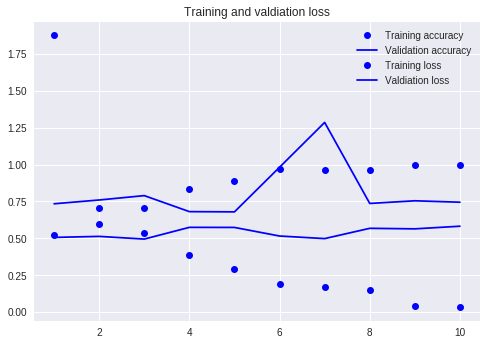

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdiation loss')
plt.title('Training and valdiation loss')
plt.legend()

plt.show()

### Training own embedding

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6922 - acc: 0.5200 - val_loss: 0.6916 - val_acc: 0.5198
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4992 - a

In [16]:
import os
test_dir = os.path.join(path, 'test')
test_labels = []
test_texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for file_name in sorted(os.listdir(dir_name)):
    if file_name[-4:] == '.txt':
      with open(os.path.join(dir_name,file_name)) as file:
        test_texts.append(file.read())
      if label_type == 'neg':
        test_labels.append(0)
      else:
        test_labels.append(1)
        
test_sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)
model.load_weights('pre_trained_glove.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 140us/step


[0.7553520709991455, 0.57252]

## Understanding RNNs

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

### Simple RNN

In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dense, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.6450 - acc: 0.6109 - val_loss: 0.5470 - val_acc: 0.7406
Epoch 2/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.4099 - acc: 0.8256 - val_loss: 0.3629 - val_acc: 0.8510
Epoch 3/10
 9984/20000 [=============>................] - ETA: 28s - loss: 0.3048 - acc: 0.8785

20000/20000 [==============================] - 59s 3ms/step - loss: 0.3085 - acc: 0.8771 - val_loss: 0.3664 - val_acc: 0.8516
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2302 - acc: 0.9116 - val_loss: 0.3714 - val_acc: 0.8530
Epoch 5/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1644 - acc: 0.9405 - val_loss: 0.3616 - val_acc: 0.8662
Epoch 6/10
  384/20000 [..............................] - ETA: 56s - loss: 0.0821 - acc: 0.9714

20000/20000 [==============================] - 60s 3ms/step - loss: 0.1112 - acc: 0.9623 - val_loss: 0.4430 - val_acc: 0.8324
Epoch 7/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.0738 - acc: 0.9767 - val_loss: 0.4802 - val_acc: 0.8292
Epoch 8/10
18432/20000 [==========================>...] - ETA: 4s - loss: 0.0469 - acc: 0.9855

20000/20000 [==============================] - 60s 3ms/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.5652 - val_acc: 0.8140
Epoch 9/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.0284 - acc: 0.9919 - val_loss: 0.5614 - val_acc: 0.8432
Epoch 10/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.0222 - acc: 0.9940 - val_loss: 0.6795 - val_acc: 0.8076


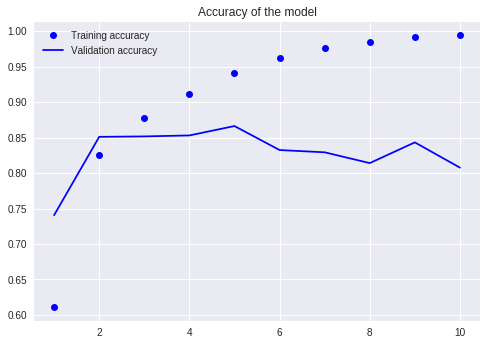

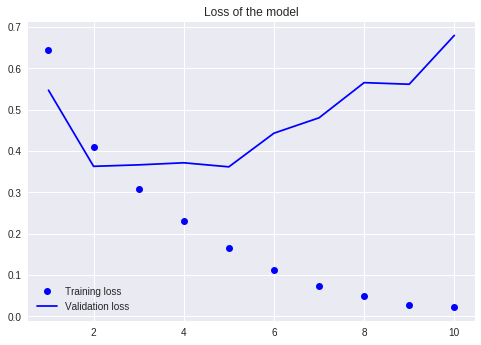

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of the model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.title('Loss of the model')

plt.show()

### LSTM and GRU

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 245s 12ms/step - loss: 0.5088 - acc: 0.7623 - val_loss: 0.4024 - val_acc: 0.8520
Epoch 2/10
20000/20000 [==============================] - 242s 12ms/step - loss: 0.2920 - acc: 0.8863 - val_loss: 0.3657 - val_acc: 0.8356
Epoch 3/10
 9600/20000 [=============>................] - ETA: 1:58 - loss: 0.2245 - acc: 0.9135

20000/20000 [==============================] - 243s 12ms/step - loss: 0.2320 - acc: 0.9102 - val_loss: 0.2898 - val_acc: 0.8874
Epoch 4/10
20000/20000 [==============================] - 249s 12ms/step - loss: 0.1939 - acc: 0.9281 - val_loss: 0.4248 - val_acc: 0.8736
Epoch 5/10
20000/20000 [==============================] - 251s 13ms/step - loss: 0.1755 - acc: 0.9357 - val_loss: 0.2890 - val_acc: 0.8780


Epoch 6/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.1529 - acc: 0.9437 - val_loss: 0.4394 - val_acc: 0.8546
Epoch 7/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.1410 - acc: 0.9493 - val_loss: 0.3719 - val_acc: 0.8810
Epoch 8/10
16256/20000 [=======================>......] - ETA: 42s - loss: 0.1271 - acc: 0.9556

20000/20000 [==============================] - 243s 12ms/step - loss: 0.1291 - acc: 0.9546 - val_loss: 0.3255 - val_acc: 0.8790
Epoch 9/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.1156 - acc: 0.9594 - val_loss: 0.4300 - val_acc: 0.8564
Epoch 10/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.1141 - acc: 0.9604 - val_loss: 0.3655 - val_acc: 0.8692


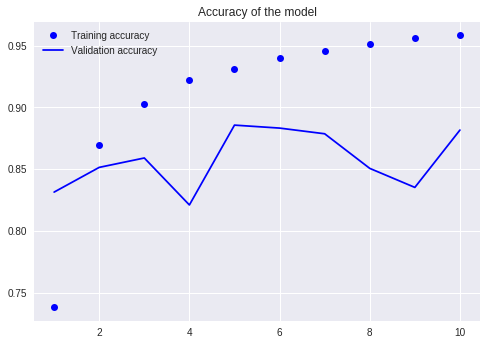

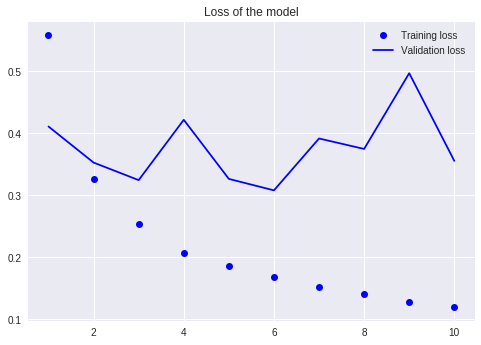

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of the model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.title('Loss of the model')

plt.show()

## Timeseries

In [1]:
!wget -nc https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip -qo jena_climate_2009_2016.csv.zip
!ls

--2018-07-19 16:02:29--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  7.78MB/s    in 1.7s    

2018-07-19 16:02:31 (7.78 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

datalab  jena_climate_2009_2016.csv  jena_climate_2009_2016.csv.zip


In [0]:
import os
weather_dir = ''
filename = os.path.join(weather_dir, 'jena_climate_2009_2016.csv')

with open(filename) as file:
  data = file.read()
  
data = data.split('\n')
header = data[0].split(',')
lines = data[1:]

import numpy as np

weather = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  weather[i,:] = values  

In [0]:
mean = weather[:200000].mean(axis=0)
weather -= mean
std = weather[:200000].std(axis=0)
weather /= std

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [0]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while True:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [0]:
train_gen = generator(weather, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(weather, lookback=lookback, delay=delay, min_index=200001, max_index=300000, shuffle=True, step=step, batch_size=batch_size)
test_gen = generator(weather, lookback=lookback, delay=delay, min_index=300001, max_index=None, shuffle=True, step=step, batch_size=batch_size)

In [7]:
val_steps = (300000 - 200001 - lookback) // batch_size 
print(val_steps)
test_steps = (len(weather) - 300001 - lookback) // batch_size 
print(test_steps)

769
930


### Naive prediction

In [30]:
def naive_prediction_mae():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:,-1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  return np.mean(batch_maes)
np_mae = naive_prediction_mae()
print(f'The naive apporach has a normalized MAE of {np_mae}')
print(f'The real world MAE is {np_mae * std[1]}')

The naive apporach has a normalized MAE of 0.2889441846094727
The real world MAE is 2.5578781290637194


### Simple dense network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                107552    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
482/500 [===========================>..] - ETA: 0s - loss: 1.6774 - mean_absolute_error: 1.6774

500/500 [==============================] - 15s 31ms/step - loss: 1.6470 - mean_absolute_error: 1.6470 - val_loss: 0.9427 - val_mean_absolute_error: 0.9427
Epoch 2/20
500/500 [==============================] - 15s 30ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - val_loss: 0.3542 - val_mean_absolute_error: 0.3542
Epoch 3/20
500/500 [==============================] - 15s 31ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - val_loss: 0.3218 - val_mean_absolute_error: 0.3218
Epoch 4/20
 99/500 [====>.........................] - ETA: 5s - loss: 0.2838 - mean_absolute_error: 0.2838

500/500 [==============================] - 15s 30ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - val_loss: 0.3045 - val_mean_absolute_error: 0.3045
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - val_loss: 0.3396 - val_mean_absolute_error: 0.3396
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - val_loss: 0.3451 - val_mean_absolute_error: 0.3451
Epoch 7/20
 40/500 [=>............................] - ETA: 5s - loss: 0.2394 - mean_absolute_error: 0.2394

500/500 [==============================] - 15s 30ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - val_loss: 0.3544 - val_mean_absolute_error: 0.3544
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - val_loss: 0.3323 - val_mean_absolute_error: 0.3323
Epoch 9/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - val_loss: 0.3224 - val_mean_absolute_error: 0.3224
Epoch 10/20
 35/500 [=>............................] - ETA: 5s - loss: 0.2276 - mean_absolute_error: 0.2276

500/500 [==============================] - 15s 30ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - val_loss: 0.3210 - val_mean_absolute_error: 0.3210
Epoch 11/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - val_loss: 0.3656 - val_mean_absolute_error: 0.3656
Epoch 12/20
473/500 [===========================>..] - ETA: 0s - loss: 0.2149 - mean_absolute_error: 0.2149

500/500 [==============================] - 16s 33ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - val_loss: 0.3247 - val_mean_absolute_error: 0.3247
Epoch 13/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - val_loss: 0.3221 - val_mean_absolute_error: 0.3221
Epoch 14/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - val_loss: 0.3236 - val_mean_absolute_error: 0.3236
Epoch 15/20
 59/500 [==>...........................] - ETA: 6s - loss: 0.2116 - mean_absolute_error: 0.2116

500/500 [==============================] - 16s 33ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - val_loss: 0.3329 - val_mean_absolute_error: 0.3329
Epoch 16/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - val_loss: 0.3550 - val_mean_absolute_error: 0.3550
Epoch 17/20
471/500 [===========================>..] - ETA: 0s - loss: 0.2032 - mean_absolute_error: 0.2032

500/500 [==============================] - 17s 33ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - val_loss: 0.3372 - val_mean_absolute_error: 0.3372
Epoch 18/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - val_loss: 0.3344 - val_mean_absolute_error: 0.3344
Epoch 19/20
500/500 [==============================] - 16s 33ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - val_loss: 0.3268 - val_mean_absolute_error: 0.3268
Epoch 20/20
 44/500 [=>............................] - ETA: 6s - loss: 0.2011 - mean_absolute_error: 0.2011

500/500 [==============================] - 16s 33ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - val_loss: 0.3404 - val_mean_absolute_error: 0.3404


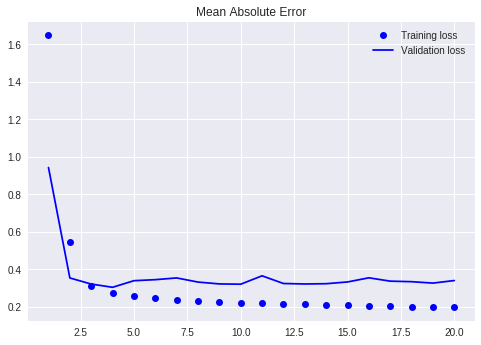

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(lookback//step, weather.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', metrics=['mae'], loss='mae')
model.summary()
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=500, validation_data=val_gen, validation_steps=val_steps)

import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(3, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae[3:], 'bo', label='Training loss')
plt.plot(epochs, val_mae[3:], 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

### GRU

In [28]:
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(32, input_shape=(None, weather.shape[-1])))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
20/20 [==============================] - 92s 5s/step - loss: 0.3758 - val_loss: 0.2980
Epoch 2/20
20/20 [==============================] - 91s 5s/step - loss: 0.3290 - val_loss: 0.2865
Epoch 3/20
20/20 [==============================] - 91s 5s/step - loss: 0.3112 - val_loss: 0.2889
Epoch 4/20
20/20 [==============================] - 91s 5s/step - loss: 0.3118 - val_loss: 0.2837
Epoch 5/20
20/20 [==============================] - 91s 5s/step - loss: 0.3014 - val_loss: 0.2784
Epoch 6/20
20/20 [==============================] - 91s 5s/step - loss: 0.3018 - val_loss: 0.2863
Epoch 7/20
20/20 [==============================] - 91s 5s/step - loss: 0.3022 - val_loss: 0.2778
Epoch 8/20
20/20 [==============================] - 92s 5s/step - loss: 0.2891 - val_loss: 0.2816
Epoch 9/20
20/20 [==============================] - 91s 5s/step - loss: 0.3033 - val_loss: 0.2801
Epoch 10/20
11/20 [===============>..............] - ETA: 3s - loss: 0.2945

20/20 [==============================] - 91s 5s/step - loss: 0.2908 - val_loss: 0.2764
Epoch 11/20
20/20 [==============================] - 91s 5s/step - loss: 0.2906 - val_loss: 0.2765
Epoch 12/20
20/20 [==============================] - 92s 5s/step - loss: 0.2842 - val_loss: 0.2737
Epoch 13/20
20/20 [==============================] - 91s 5s/step - loss: 0.2912 - val_loss: 0.2743
Epoch 14/20
20/20 [==============================] - 91s 5s/step - loss: 0.2896 - val_loss: 0.2767
Epoch 15/20
20/20 [==============================] - 91s 5s/step - loss: 0.2924 - val_loss: 0.2777
Epoch 16/20
20/20 [==============================] - 91s 5s/step - loss: 0.2941 - val_loss: 0.2728
Epoch 17/20
20/20 [==============================] - 91s 5s/step - loss: 0.2840 - val_loss: 0.2716
Epoch 18/20
20/20 [==============================] - 91s 5s/step - loss: 0.2892 - val_loss: 0.2812
Epoch 19/20
13/20 [==================>...........] - ETA: 2s - loss: 0.2925

20/20 [==============================] - 91s 5s/step - loss: 0.2937 - val_loss: 0.2762
Epoch 20/20
20/20 [==============================] - 92s 5s/step - loss: 0.2973 - val_loss: 0.2730


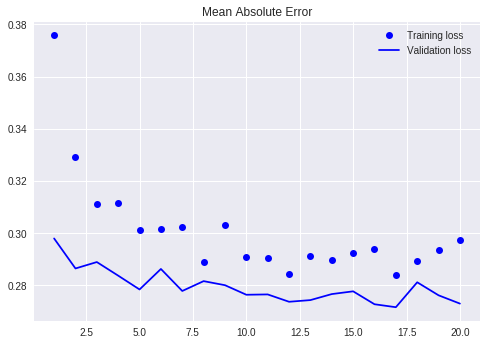

In [29]:
import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

### Dropout

Epoch 1/20
40/40 [==============================] - 143s 4s/step - loss: 0.3969 - val_loss: 0.2954
Epoch 2/20
40/40 [==============================] - 143s 4s/step - loss: 0.3499 - val_loss: 0.2881
Epoch 3/20
40/40 [==============================] - 140s 4s/step - loss: 0.3410 - val_loss: 0.2844
Epoch 4/20
40/40 [==============================] - 141s 4s/step - loss: 0.3363 - val_loss: 0.2817
Epoch 5/20
40/40 [==============================] - 140s 3s/step - loss: 0.3380 - val_loss: 0.2807
Epoch 6/20
40/40 [==============================] - 139s 3s/step - loss: 0.3281 - val_loss: 0.2826
Epoch 7/20
30/40 [=====================>........] - ETA: 5s - loss: 0.3365

40/40 [==============================] - 139s 3s/step - loss: 0.3322 - val_loss: 0.2814
Epoch 8/20
40/40 [==============================] - 139s 3s/step - loss: 0.3217 - val_loss: 0.2808
Epoch 9/20
40/40 [==============================] - 141s 4s/step - loss: 0.3193 - val_loss: 0.2785
Epoch 10/20
40/40 [==============================] - 140s 4s/step - loss: 0.3230 - val_loss: 0.2789
Epoch 11/20
40/40 [==============================] - 140s 4s/step - loss: 0.3276 - val_loss: 0.2786
Epoch 12/20
40/40 [==============================] - 140s 3s/step - loss: 0.3303 - val_loss: 0.2767
Epoch 13/20
37/40 [==========================>...] - ETA: 1s - loss: 0.3207

40/40 [==============================] - 138s 3s/step - loss: 0.3208 - val_loss: 0.2850
Epoch 14/20
40/40 [==============================] - 138s 3s/step - loss: 0.3234 - val_loss: 0.2814
Epoch 15/20
40/40 [==============================] - 138s 3s/step - loss: 0.3124 - val_loss: 0.2778
Epoch 16/20
40/40 [==============================] - 138s 3s/step - loss: 0.3155 - val_loss: 0.2825
Epoch 17/20
40/40 [==============================] - 140s 4s/step - loss: 0.3131 - val_loss: 0.2747
Epoch 18/20
40/40 [==============================] - 140s 4s/step - loss: 0.3134 - val_loss: 0.2751
Epoch 19/20
37/40 [==========================>...] - ETA: 1s - loss: 0.3139

40/40 [==============================] - 140s 4s/step - loss: 0.3149 - val_loss: 0.2780
Epoch 20/20
40/40 [==============================] - 141s 4s/step - loss: 0.3139 - val_loss: 0.2746


ValueError: ignored

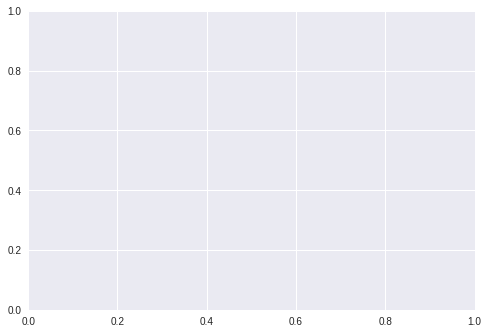

In [31]:
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(32, input_shape=(None, weather.shape[-1]), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=40, validation_data=val_gen, validation_steps=val_steps)

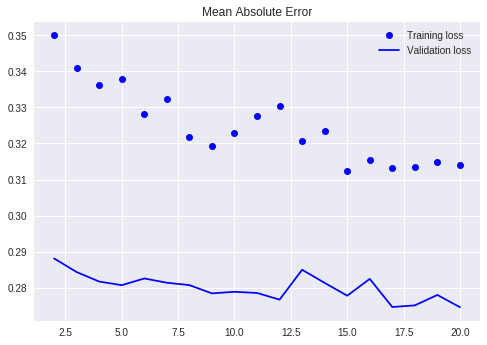

In [36]:
import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(2, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae[1:], 'bo', label='Training loss')
plt.plot(epochs, val_mae[1:], 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

### Stacking layers

Using TensorFlow backend.


Epoch 1/20
40/40 [==============================] - 271s 7s/step - loss: 0.4245 - val_loss: 0.3028
Epoch 2/20
40/40 [==============================] - 267s 7s/step - loss: 0.3506 - val_loss: 0.2983
Epoch 3/20
40/40 [==============================] - 272s 7s/step - loss: 0.3321 - val_loss: 0.2906
Epoch 4/20
40/40 [==============================] - 271s 7s/step - loss: 0.3393 - val_loss: 0.2844
Epoch 5/20
40/40 [==============================] - 271s 7s/step - loss: 0.3345 - val_loss: 0.2822
Epoch 6/20
40/40 [==============================] - 269s 7s/step - loss: 0.3234 - val_loss: 0.2838
Epoch 7/20
30/40 [=====================>........] - ETA: 11s - loss: 0.3266

40/40 [==============================] - 268s 7s/step - loss: 0.3249 - val_loss: 0.2804
Epoch 8/20
40/40 [==============================] - 271s 7s/step - loss: 0.3254 - val_loss: 0.2806
Epoch 9/20
40/40 [==============================] - 264s 7s/step - loss: 0.3229 - val_loss: 0.2801
Epoch 10/20
40/40 [==============================] - 266s 7s/step - loss: 0.3196 - val_loss: 0.2761
Epoch 11/20
40/40 [==============================] - 267s 7s/step - loss: 0.3159 - val_loss: 0.2810
Epoch 12/20
40/40 [==============================] - 266s 7s/step - loss: 0.3151 - val_loss: 0.2776
Epoch 13/20
37/40 [==========================>...] - ETA: 3s - loss: 0.3204

40/40 [==============================] - 267s 7s/step - loss: 0.3200 - val_loss: 0.2903
Epoch 14/20
40/40 [==============================] - 268s 7s/step - loss: 0.3174 - val_loss: 0.2754
Epoch 15/20
40/40 [==============================] - 269s 7s/step - loss: 0.3168 - val_loss: 0.2762
Epoch 16/20
40/40 [==============================] - 270s 7s/step - loss: 0.3076 - val_loss: 0.2789
Epoch 17/20
40/40 [==============================] - 264s 7s/step - loss: 0.3133 - val_loss: 0.2748
Epoch 18/20
40/40 [==============================] - 266s 7s/step - loss: 0.3120 - val_loss: 0.2757
Epoch 19/20
37/40 [==========================>...] - ETA: 3s - loss: 0.3136

40/40 [==============================] - 266s 7s/step - loss: 0.3129 - val_loss: 0.2789
Epoch 20/20
40/40 [==============================] - 271s 7s/step - loss: 0.3128 - val_loss: 0.2736


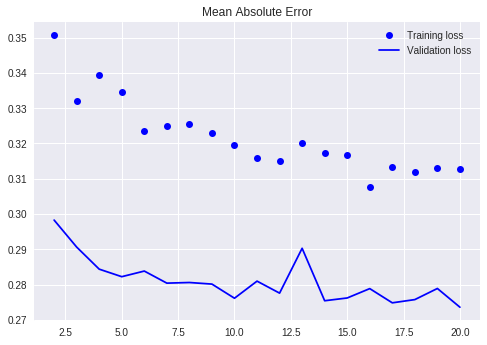

In [8]:
from keras.models import Sequential
from keras.layers import Dense, GRU

model = Sequential()
model.add(GRU(32, input_shape=(None, weather.shape[-1]), dropout=0.1, recurrent_dropout=0.5, return_sequences=True))
model.add(GRU(64, dropout=0.1, recurrent_dropout=0.5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, epochs=20, steps_per_epoch=40, validation_data=val_gen, validation_steps=val_steps)

import matplotlib.pyplot as plt
mae = history.history['loss']
val_mae = history.history['val_loss']
epochs = range(2, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae[1:], 'bo', label='Training loss')
plt.plot(epochs, val_mae[1:], 'b', label='Validation loss')
plt.title('Mean Absolute Error')
plt.legend()

plt.show()

### Bidirectional layers


#### IMDB with LSTM

In [9]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['acc']
epochs = range(2, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae[1:], 'bo', label='Training accuracy')
plt.plot(epochs, val_mae[1:], 'b', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 513s 26ms/step - loss: 0.5700 - acc: 0.7223 - val_loss: 0.4111 - val_acc: 0.8202
Epoch 2/30
20000/20000 [==============================] - 524s 26ms/step - loss: 0.3970 - acc: 0.8373 - val_loss: 0.4221 - val_acc: 0.8184
Epoch 3/30
 9600/20000 [=============>................] - ETA: 4:14 - loss: 0.3340 - acc: 0.8685

20000/20000 [==============================] - 521s 26ms/step - loss: 0.3328 - acc: 0.8679 - val_loss: 0.3674 - val_acc: 0.8434
Epoch 4/30
20000/20000 [==============================] - 512s 26ms/step - loss: 0.2955 - acc: 0.8831 - val_loss: 0.3943 - val_acc: 0.8298
Epoch 5/30
20000/20000 [==============================] - 516s 26ms/step - loss: 0.2700 - acc: 0.8967 - val_loss: 0.3922 - val_acc: 0.8258


Epoch 6/30
20000/20000 [==============================] - 523s 26ms/step - loss: 0.2541 - acc: 0.9035 - val_loss: 0.3992 - val_acc: 0.8258
Epoch 7/30
20000/20000 [==============================] - 521s 26ms/step - loss: 0.2330 - acc: 0.9127 - val_loss: 0.3865 - val_acc: 0.8376
Epoch 8/30
16256/20000 [=======================>......] - ETA: 1:30 - loss: 0.2198 - acc: 0.9219

20000/20000 [==============================] - 516s 26ms/step - loss: 0.2249 - acc: 0.9181 - val_loss: 0.3758 - val_acc: 0.8568
Epoch 9/30
20000/20000 [==============================] - 514s 26ms/step - loss: 0.2099 - acc: 0.9243 - val_loss: 0.3735 - val_acc: 0.8484
Epoch 10/30
20000/20000 [==============================] - 522s 26ms/step - loss: 0.1952 - acc: 0.9280 - val_loss: 0.3787 - val_acc: 0.8468
Epoch 11/30
 1024/20000 [>.............................] - ETA: 7:47 - loss: 0.1969 - acc: 0.9229

20000/20000 [==============================] - 520s 26ms/step - loss: 0.1879 - acc: 0.9307 - val_loss: 0.4376 - val_acc: 0.8350
Epoch 12/30
20000/20000 [==============================] - 515s 26ms/step - loss: 0.1836 - acc: 0.9334 - val_loss: 0.4074 - val_acc: 0.8358
Epoch 13/30
17920/20000 [=========================>....] - ETA: 50s - loss: 0.1699 - acc: 0.9398

20000/20000 [==============================] - 513s 26ms/step - loss: 0.1701 - acc: 0.9394 - val_loss: 0.3834 - val_acc: 0.8596
Epoch 14/30
20000/20000 [==============================] - 519s 26ms/step - loss: 0.1589 - acc: 0.9441 - val_loss: 0.4074 - val_acc: 0.8482
Epoch 15/30
20000/20000 [==============================] - 522s 26ms/step - loss: 0.1576 - acc: 0.9426 - val_loss: 0.4113 - val_acc: 0.8410
Epoch 16/30
 1152/20000 [>.............................] - ETA: 7:35 - loss: 0.1500 - acc: 0.9505

20000/20000 [==============================] - 515s 26ms/step - loss: 0.1501 - acc: 0.9469 - val_loss: 0.4033 - val_acc: 0.8534
Epoch 17/30
20000/20000 [==============================] - 517s 26ms/step - loss: 0.1418 - acc: 0.9503 - val_loss: 0.4048 - val_acc: 0.8590
Epoch 18/30
18048/20000 [==========================>...] - ETA: 47s - loss: 0.1370 - acc: 0.9531

20000/20000 [==============================] - 520s 26ms/step - loss: 0.1363 - acc: 0.9532 - val_loss: 0.4701 - val_acc: 0.8498
Epoch 19/30
20000/20000 [==============================] - 526s 26ms/step - loss: 0.1315 - acc: 0.9539 - val_loss: 0.4334 - val_acc: 0.8476
Epoch 20/30
20000/20000 [==============================] - 523s 26ms/step - loss: 0.1225 - acc: 0.9574 - val_loss: 0.4594 - val_acc: 0.8438
Epoch 21/30
 1152/20000 [>.............................] - ETA: 7:37 - loss: 0.1205 - acc: 0.9549

20000/20000 [==============================] - 518s 26ms/step - loss: 0.1209 - acc: 0.9577 - val_loss: 0.4792 - val_acc: 0.8434
Epoch 22/30
20000/20000 [==============================] - 530s 27ms/step - loss: 0.1154 - acc: 0.9598 - val_loss: 0.4353 - val_acc: 0.8518
Epoch 23/30
18048/20000 [==========================>...] - ETA: 48s - loss: 0.1036 - acc: 0.9648

20000/20000 [==============================] - 523s 26ms/step - loss: 0.1050 - acc: 0.9643 - val_loss: 0.4494 - val_acc: 0.8596
Epoch 24/30
20000/20000 [==============================] - 527s 26ms/step - loss: 0.1058 - acc: 0.9633 - val_loss: 0.5900 - val_acc: 0.8278
Epoch 25/30
20000/20000 [==============================] - 539s 27ms/step - loss: 0.0995 - acc: 0.9651 - val_loss: 0.4473 - val_acc: 0.8554
Epoch 26/30
 1152/20000 [>.............................] - ETA: 7:47 - loss: 0.0799 - acc: 0.9731

19968/20000 [============================>.] - ETA: 0s - loss: 0.0970 - acc: 0.9666

#### Jena weather with GRU

In [0]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Bidirectional

model = Sequential()
model.add(Bidirectional(GRU(32, droput=0.2, recurrent_dropout=0.2), input_shape=(None, weather.shape[-1])))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_generator, steps_per_epoch=500, epochs=50, validation_data=val_gen, validation_steps=val_steps)

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(2, len(mae) + 1)

plt.figure()
plt.plot(epochs, mae[1:], 'bo', label='Training accuracy')
plt.plot(epochs, val_mae[1:], 'b', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

## 1D convnets

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit_generator(x_train, y_tain, epochs=10, batch_size=128, validation+split=0.2)

In [0]:
def plot_it(name):
  import matplotlib.pyplot as plt
  acc = history.history[name]
  val_acc = history.history['val_'+name]
  epochs = range(2, len(mae) + 1)

  plt.figure()
  plt.plot(epochs, mae[1:], 'bo', label='Training '+name)
  plt.plot(epochs, val_mae[1:], 'b', label='Validation '+name)
  plt.title(name)
  plt.legend()

  plt.show()


In [0]:
plot_it('acc')

### Order sensitivity

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(None, weather.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)
plot_it('loss')

### 1D convnets + RNNs

In [0]:
step = 3
lookback = 720
delay = 144
train_gen = generator(weather, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step)
val_gen = generator(weather, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step)
test_gen = generator(weather, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step)
val_steps = (300000 - 200001 - lookback) // 128
print(val_steps)
test_steps = (len(weather) - 300001 - lookback) // 128
print(test_steps)

In [0]:
from keras.models import Sequential
from keras.layers import GRU, Conv1D, MaxPooling1D, Dense

model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(None, weather.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))
model.summary()
model.compile(optimizer-'rmsprop', loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)